In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:

fulldf=pd.read_csv('fulldf.csv')

In [30]:
fulldf.head()

,Title,Movie Rating,Year,Director,Gross Income,Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget,Profit percent
0,12 Years a Slave,R,2013,Steve McQueen,56.67,"['Biography', ' Drama', ' History']",134,8.1,620348.0,20.0,183.350000
1,127 Hours,R,2010,Danny Boyle,18.34,"['Biography', ' Drama']",94,7.6,340655.0,18.0,1.888889
2,2001: A Space Odyssey,G,1968,Stanley Kubrick,56.95,"['Adventure', ' Sci-Fi']",149,8.3,583340.0,10.5,442.380952
3,21 Grams,R,2003,Alejandro G. Iñárritu,16.29,"['Crime', ' Drama', ' Thriller']",124,7.7,220522.0,20.0,-18.550000
4,25th Hour,R,2002,Spike Lee,13.06,['Drama'],135,7.6,167314.0,4.5,190.222222


# Top 20 grossing movies and Top 20 most profitable movies

In [36]:
"""Funtion to plot bargraphs using the (Dataframe, xvalues,yvalues,string title)"""
def bargraph (Dataframe,xColumn,yColumn,str):
    plt.figure(figsize=(15,10))
    sns.barplot(y=yColumn,x=xColumn)
    plt.title(str)
    

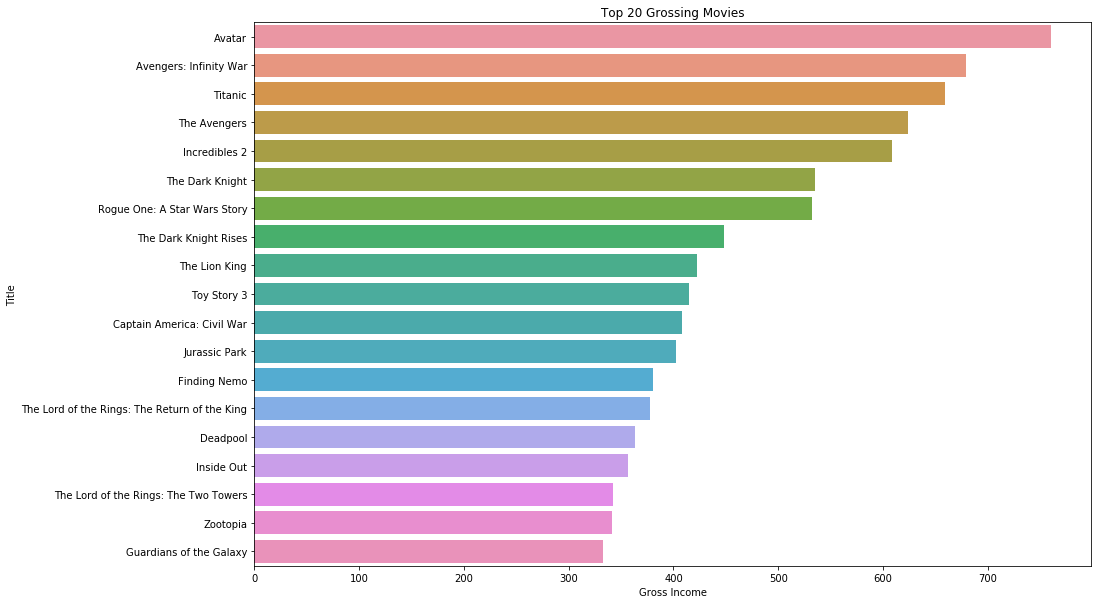

In [39]:
group_df = fulldf.sort_values('Gross Income',ascending=False).reset_index().head(20) # Creat new df with sorted gross income values and limit to top 20
bargraph(group_df,group_df['Gross Income'],group_df['Title'],"Top 20 Grossing Movies")



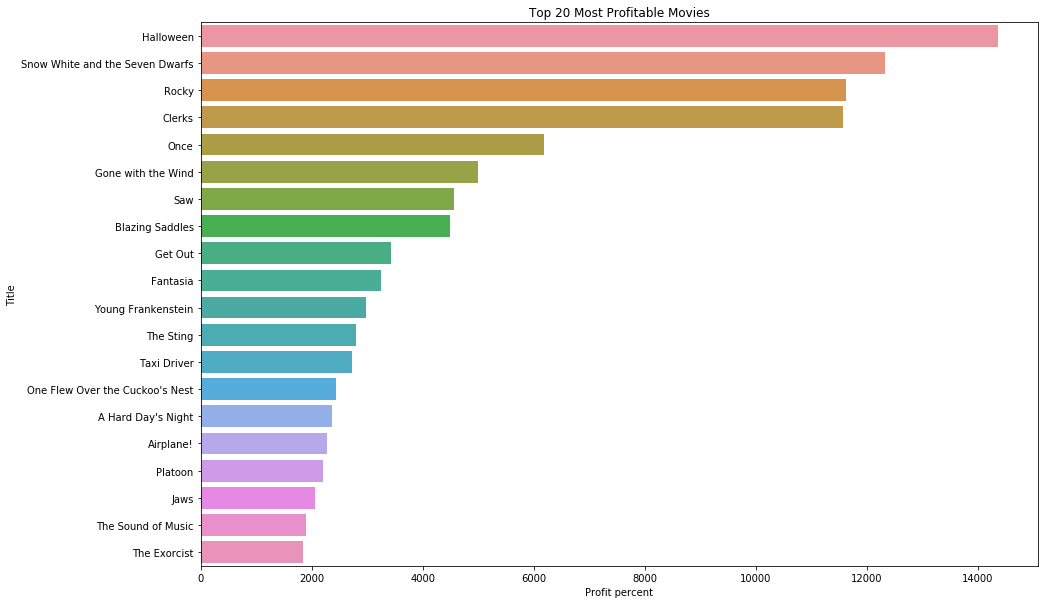

In [41]:
group_df = fulldf.sort_values('Profit percent',ascending=False).reset_index().head(20)
bargraph(group_df,group_df['Profit percent'],group_df['Title'],"Top 20 Most Profitable Movies")


## We can see that none of the top Grossing movies are among the most profitable , perhaps this will be more clear when we look at whats happening to the % profit as gross increases. 

In [8]:
#sns.distplot( fulldf["Profit_percent"] , color="skyblue" )
#sns.distplot( fulldf["Gross_Income"] , color="red")
# need to elimate outliers and regraph lmplot

In [9]:
#sns.boxplot(fulldf["Profit_percent"])
#sns.boxplot(fulldf["Gross_Income"])

# What genres generated most Gross Income 

In [42]:
Genre_group_df = fulldf.groupby('Movie Genre')['Movie Genre','Gross Income'].mean() # new df with groped data based on genre, along with related gross income means

In [43]:
Genre_group_df = Genre_group_df.sort_values('Gross Income',ascending=False).reset_index().head(20)# sort the df based on Gross income values, limi to top 20

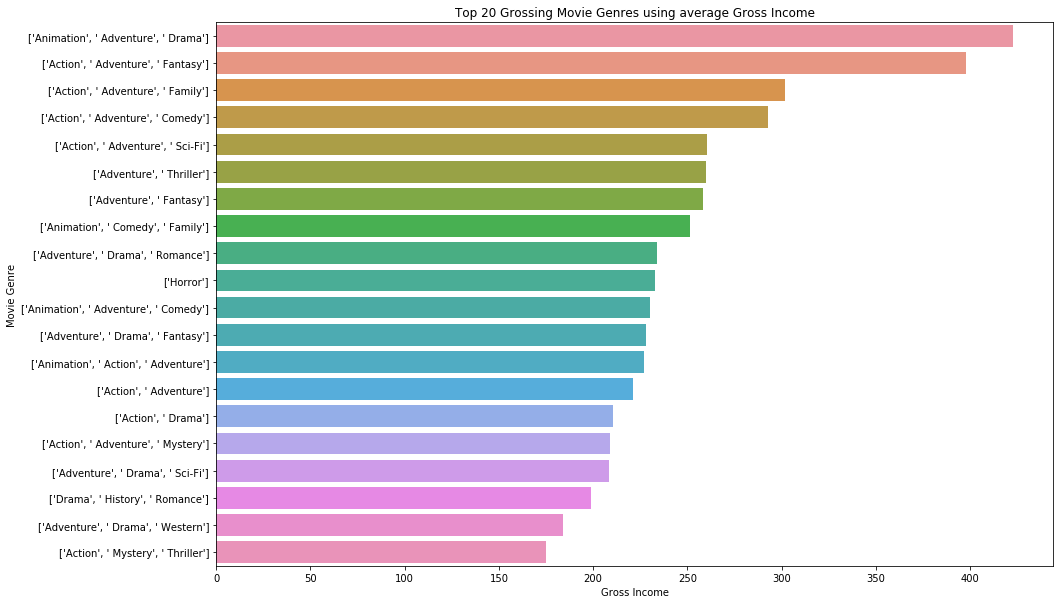

In [44]:
bargraph(Genre_group_df,Genre_group_df['Gross Income'],Genre_group_df['Movie Genre'],"Top 20 Grossing Movie Genres using average Gross Income")


In [45]:
Genre_group_df = fulldf.groupby('Movie Genre')['Movie Genre','Profit percent'].mean()

In [46]:
Genre_group_df = Genre_group_df.sort_values('Profit percent',ascending=False).reset_index().head(20)

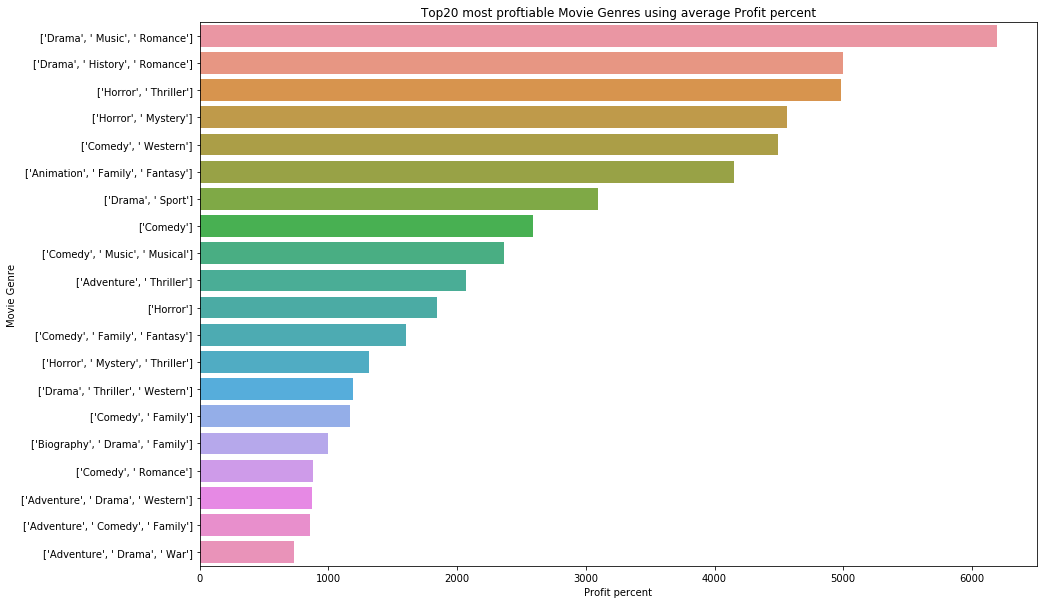

In [48]:
bargraph(Genre_group_df,Genre_group_df['Profit percent'],Genre_group_df['Movie Genre'],"Top20 most proftiable Movie Genres using average Profit percent")

# Keytakeaways: Movies that made the most profit and the movies that Generated most gross income have a combination of genres as opposed to a single genre. Among that Seems action and adventure is the most frequently occuring genre on the top 20 grossing


In [52]:
group_df = fulldf.groupby('Movie Genre')['Movie Genre','IMDb Rating'].mean()

group_df.head()

,IMDb Rating
Movie Genre,
"['Action', ' Adventure', ' Comedy']",7.860000
"['Action', ' Adventure', ' Drama']",8.012500
"['Action', ' Adventure', ' Family']",7.600000
"['Action', ' Adventure', ' Fantasy']",7.866667
"['Action', ' Adventure', ' Mystery']",7.600000


In [53]:
group_df = group_df.sort_values('IMDb Rating',ascending=False).reset_index().head(20)

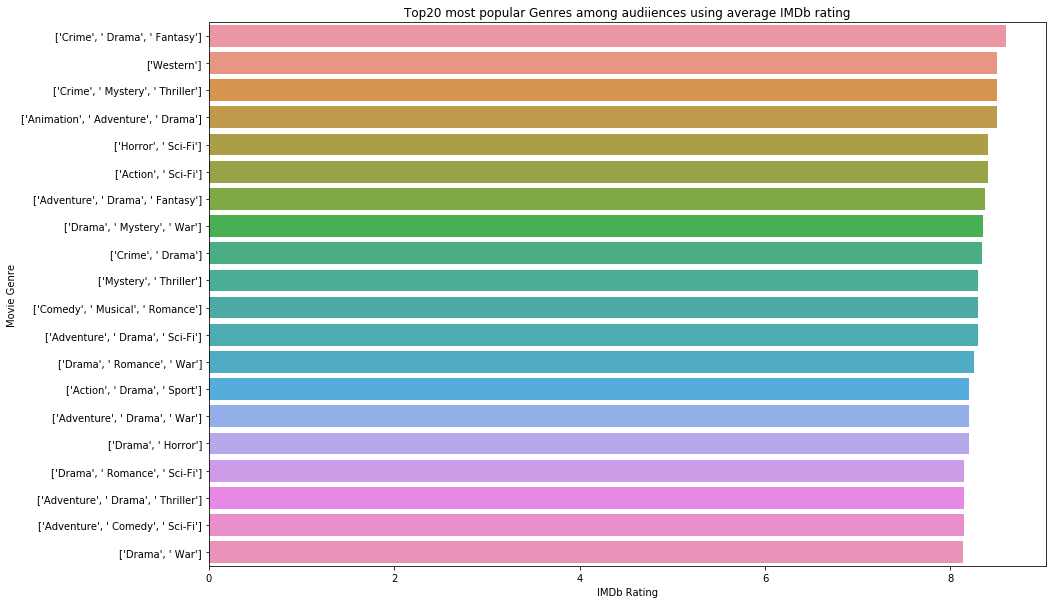

In [54]:
bargraph(group_df,group_df['IMDb Rating'],group_df['Movie Genre'],"Top20 most popular Genres among audiiences using average IMDb rating")



In [75]:
Dcounts = fulldf.groupby('Movie Genre').count()
Dcounts= Dcounts.sort_values('Title',ascending=False).reset_index().head(20)


In [76]:
Dcounts.rename(columns = {'Title':'Title count'}, inplace = True) 

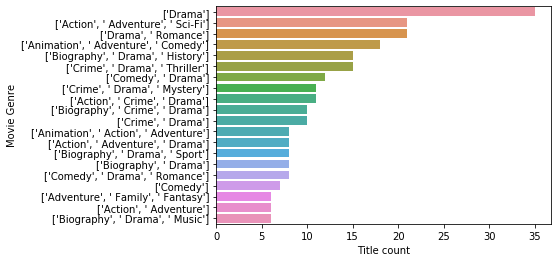

In [77]:
plt6=sns.barplot(y=Dcounts['Movie Genre'],x=Dcounts['Title count'])
#Dcounts.sort_values('Director',ascending=False)

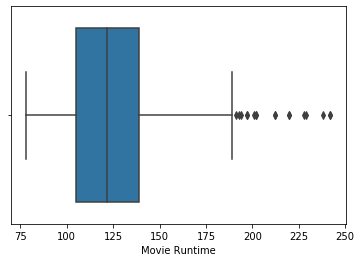

In [301]:
sns.boxplot(fulldf['Movie Runtime'])


In [305]:
fulldf['Movie Runtime'].describe()

count    474.000000
mean     125.660338
std       28.658679
min       78.000000
25%      105.000000
50%      121.500000
75%      139.000000
max      242.000000
Name: Movie Runtime, dtype: float64

In [317]:
upoutlier =125.66 + 3*28.66 # 211.64
lowoutlier = 125.66 - 3*28.66 # 39.68
upoutlier

211.64

# In the Top1000 Movies considering each second of movie production costs money , a max runtime of approx 212 min is ideal. This is further validated by the runtime of top20 grossing and top20 most profitable as shown below. (Gone with the wind is an outlier)


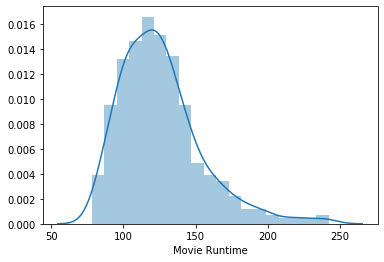

In [306]:
sns.distplot(fulldf['Movie Runtime'])

In [347]:

group_df = fulldf.sort_values('Gross_Income',ascending=False).reset_index().head(20) # Creat new df with sorted gross income values and limit to top 20


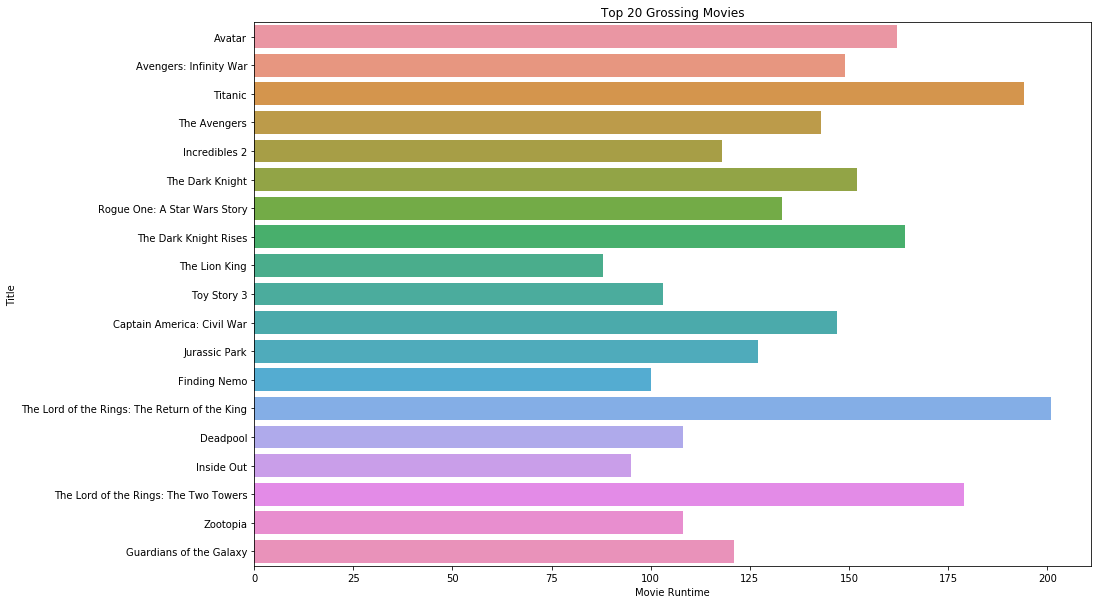

In [303]:
plt.figure(figsize=(15,10))
plt.title("Top 20 Grossing Movies Runtime")
plt8=sns.barplot(y=group_df.Title,x=group_df['Movie Runtime'])


In [337]:
group_df = fulldf.sort_values('Profit_percent',ascending=False).reset_index().head(20)


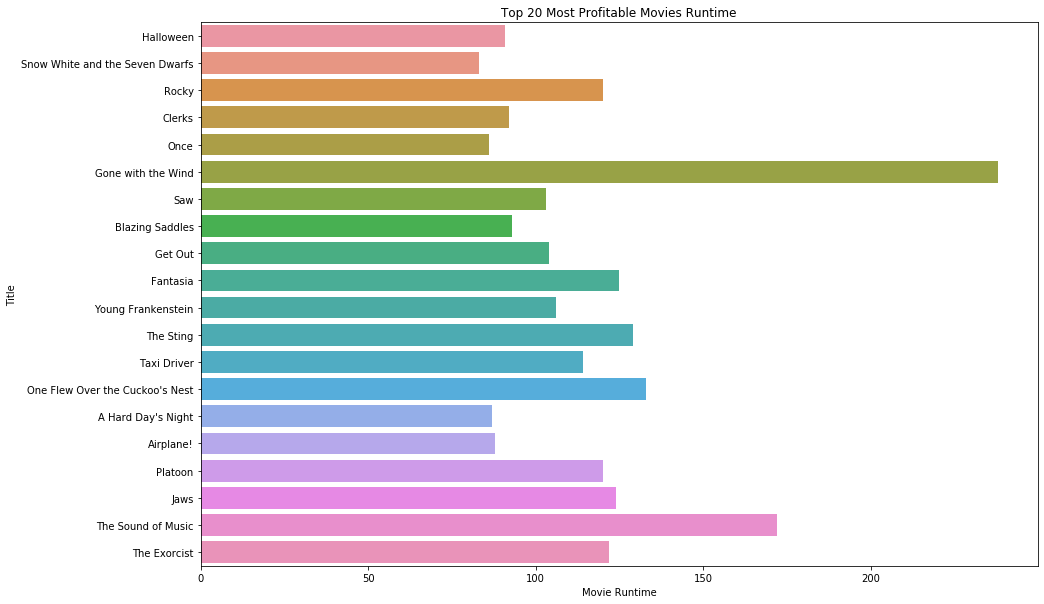

In [346]:
plt.figure(figsize=(15,10))
plt.title("Top 20 Most Profitable Movies Runtime")
plt9=sns.barplot(y=group_df.Title,x=group_df['Movie Runtime'])
#plt9.set_xticklabels(plt9.get_xticklabels(), rotation=90)

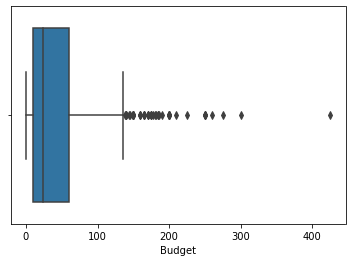

In [350]:
sns.boxplot(fulldf['Budget'])


In [351]:
fulldf['Budget'].describe()

count    474.000000
mean      46.484499
std       58.688403
min        0.027000
25%       10.000000
50%       23.300000
75%       60.000000
max      425.000000
Name: Budget, dtype: float64

# Top1000 movies of imdb had a Average buget of 46 million

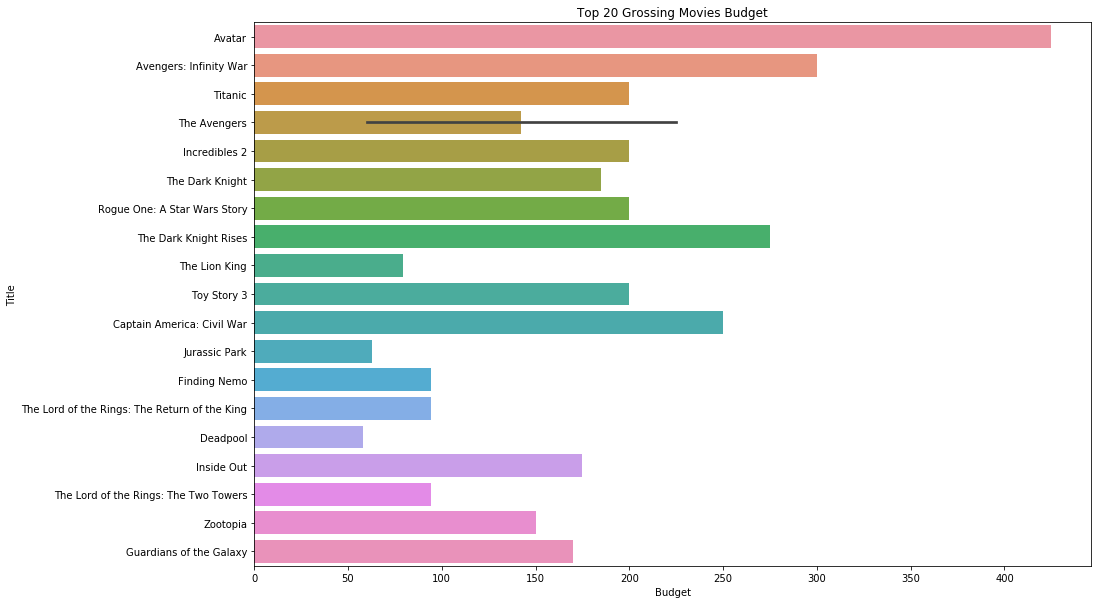

In [355]:

group_df = fulldf.sort_values('Gross_Income',ascending=False).reset_index().head(20) # Creat new df with sorted gross income values and limit to top 20
plt.figure(figsize=(15,10))
plt.title("Top 20 Grossing Movies Budget")
plt11=sns.barplot(y=group_df.Title,x=group_df.Budget)


In [354]:
group_df['Budget'].describe()

count     20.000000
mean     174.865000
std       93.976236
min       58.000000
25%       94.000000
50%      180.000000
75%      206.250000
max      425.000000
Name: Budget, dtype: float64

# Top 20 Grossing movies had an average budget of 174 million

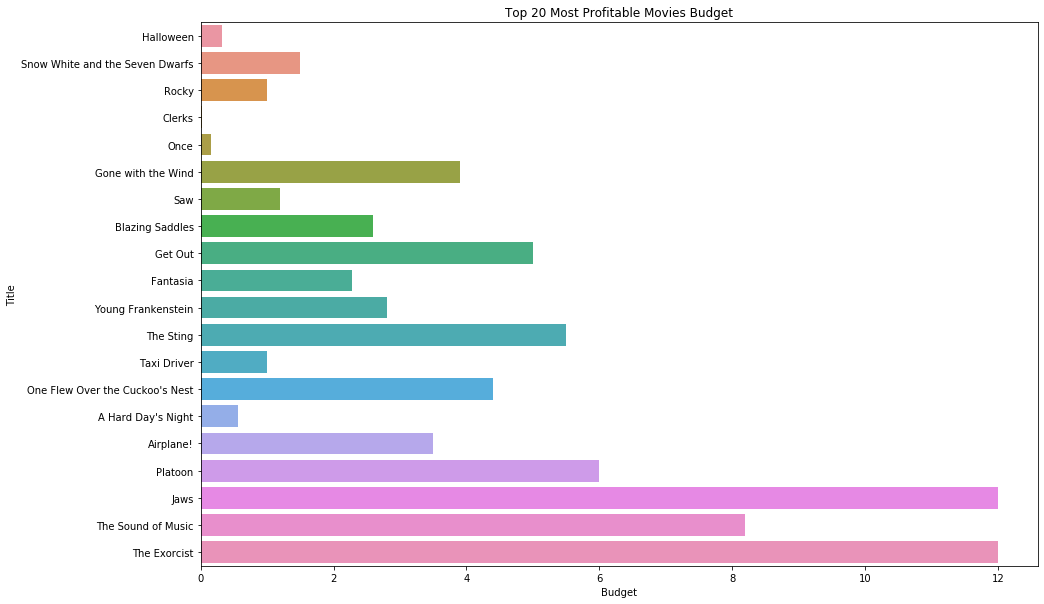

In [385]:
group_df = fulldf.sort_values('Profit_percent',ascending=False).reset_index().head(20)
plt.figure(figsize=(15,10))
plt.title("Top 20 Most Profitable Movies Budget")
plt12=sns.barplot(y=group_df.Title,x=group_df.Budget)

In [357]:
group_df['Budget'].describe()

count    20.00000
mean      3.69650
std       3.59768
min       0.02700
25%       1.00000
50%       2.70000
75%       5.12500
max      12.00000
Name: Budget, dtype: float64

# Top 20 most profitable movies had an average budget of approx 4 million

# So perhaps microsoft wants to invest less and do it more often so theres less risk per investment or take a bigger risk and do a full blown production ...upto companies goals/agressiveness etc?

In [373]:

director_df=fulldf.groupby('Director').count()

In [386]:
director_df=director_df.sort_values('Title',ascending=False).reset_index().head(20)

In [387]:
director_df.head()

,index,Director,Title,Movie Rating,Year,Gross_Income,Movie_Genre,Movie Runtime,IMDb Rating,Votes,Budget,Profit_percent
0,0,Steven Spielberg,10,10,10,10,10,10,10,10,10,10
1,1,Christopher Nolan,8,8,8,8,8,8,8,8,8,8
2,2,Martin Scorsese,8,8,8,8,8,8,8,8,8,8
3,3,David Fincher,8,8,8,8,8,8,8,8,8,8
4,4,Clint Eastwood,7,7,7,7,7,7,7,7,7,7


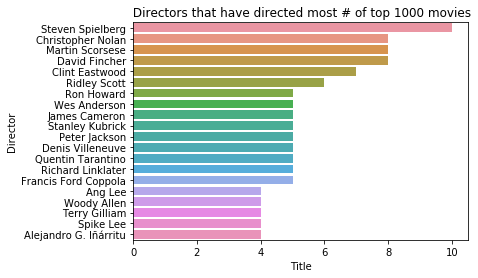

In [383]:

plt.title(" Directors that have directed most # of top 1000 movies")
plt13=sns.barplot(y=director_df.Director,x=director_df.Title)
